In [1]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mordred import Calculator, descriptors
import seaborn as sns
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
%matplotlib inline
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings

In [34]:
df = pd.read_csv('df_no_chiral.csv')
k41= pd.read_csv('41k.csv')
k41

,Code,SMILES
0,1_1,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
1,1_2,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
2,1_3,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
3,1_4,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
4,1_5,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
...,...,...
41587,7_15116,O=C(N(CCC1=CC(OC)=C(OCCCC2=CC=C(OC)C(OC)=C2OC)...
41588,7_15117,O=C(N(CCC1=CC(OC)=C(OCCCC2=C(OC)C=C(OC)C=C2OC)...
41589,7_15118,O=C(N(CCC1=CC(OC)=C(OCCCC2=CC=CC=N2)C=C1)C3=NC...
41590,7_15119,O=C(N(CCC1=CC(OC)=C(OCCCC2=CC=CN=C2)C=C1)C3=NC...


In [35]:
PandasTools.AddMoleculeColumnToFrame(k41, 'SMILES', 'Molecule')
def generate_fpts(data):
    Mfpts_41 = []
    for mol in tqdm(data):
        mfpts_41 = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)
        Mfpts_41.append(mfpts_41)

    return np.array(Mfpts_41)
mfpts_41 = generate_fpts(k41.Molecule)
morgan_41 = pd.DataFrame(mfpts_41)

  0%|          | 0/41592 [00:00<?, ?it/s][14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPRECATION WARNING: please use MorganGenerator
[14:16:59] DEPR

In [37]:
screen_41 = morgan_41

In [17]:
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule')
def generate_fpts(data):
    Mfpts = []
    for mol in tqdm(data):
        mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)
        Mfpts.append(mfpt)

    return np.array(Mfpts)
mfpts = generate_fpts(df.Molecule)
morgan = pd.DataFrame(mfpts)


  0%|          | 0/1193 [00:00<?, ?it/s][14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRE

In [18]:
X = morgan
Y = df.pIC50
X

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1190,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1191,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=25)

In [44]:
column_to_drop = []

In [45]:
X_train = pd.DataFrame(X_train)

In [46]:
corr_matrix = X_train.corr().abs()


up_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
col_corr = [column for column in up_triangle.columns if any(up_triangle[column]>= 0.8)]
for i in range(len(col_corr)):
    column_to_drop.append(col_corr[i])


variances = X_train.var()
col_var = variances[variances <= 0.1].index
for j in range(len(col_var)):
    column_to_drop.append(col_var[j])

In [47]:
column_to_drop = list(set(column_to_drop))
len(column_to_drop)

433

In [48]:
X_test = pd.DataFrame(X_test)
X_train_drop = X_train.drop(columns= column_to_drop)
X_test_drop = X_test.drop(columns=column_to_drop)

In [49]:
screen_41_drop = screen_41.drop(columns=column_to_drop)


In [50]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

model = SVR(C=5)

model.fit(X_train_drop, Y_train)
Y_pred_train = model.predict(X_train_drop)
Y_pred_test = model.predict(X_test_drop)

cross = cross_val_score(model, X_train_drop, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.9793587572229927
r2test:0.8685579741882015
[0.87888273 0.83083805 0.87726557 0.84119499 0.88440094 0.83360714
 0.88810815 0.86859487 0.86178872 0.89104975]
0.8655730907374168


In [55]:
model = SVR(C=5)

model.fit(X_train_drop, Y_train)
# Y_pred_train = model.predict(X_train_drop)
# Y_pred_test = model.predict(X_test_drop)
Y_pred_41 = model.predict(screen_41_drop)

# cross = cross_val_score(model, X_train_drop, Y_train, cv = 10)

# print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
# print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
# print (cross)
# print (cross.mean())
Y_pred_41 = pd.DataFrame(Y_pred_41)


In [125]:
Y_pred_41[Y_pred_41>=7].count()

0           14458
leverage        0
residual        0
squared         0
standard        0
dtype: int64

In [14]:
from sklearn.model_selection import GridSearchCV


params = {'C':[0.1,1,10,20,50,100],
          'epsilon':[1e-2,0.1,0.2,0.5]
}
model = SVR()

grid = GridSearchCV(model, params, scoring='r2',cv=10, verbose = 1)
grid.fit(X_train_drop, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'C': 1, 'epsilon': 0.1}
0.8558391291610784


In [106]:
X_train_drop = X_train_drop.to_numpy()
X_test_drop = X_test_drop.to_numpy()

In [107]:
leverage_train = np.diag(X_train_drop@ np.linalg.pinv(X_train_drop.T @ X_train_drop) @ X_train_drop.T)
leverage_test = np.diag(X_test_drop@ np.linalg.pinv(X_train_drop.T @ X_train_drop) @ X_test_drop.T)

In [30]:
X_train_drop.shape

(954, 79)

<Axes: ylabel='Count'>

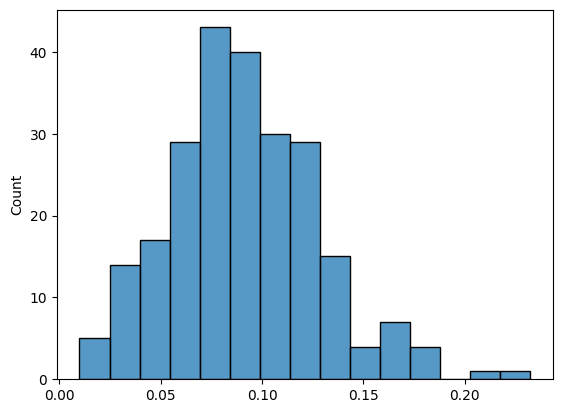

In [31]:
sns.histplot(leverage_test)

In [65]:
leverage_test_ = pd.DataFrame(leverage_test)
leverage_test_[leverage_test_>0.15].count()

0    15
dtype: int64

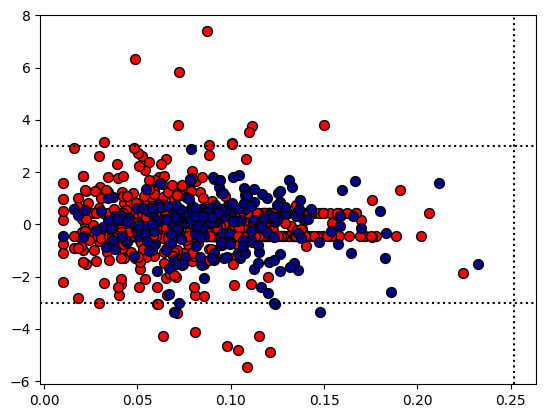

In [32]:
Y_train = pd.DataFrame(Y_train)
Y_train['pred'] = Y_pred_train
Y_train['residual'] = Y_train['pIC50'] - Y_train['pred']
Y_train['squared'] = Y_train['residual']**2
mse_train = Y_train['squared'].sum()/(len(Y_train['squared']))
Y_train['leverage'] = leverage_train
Y_train['standard'] = Y_train['residual']/(mse_train)**0.5

Y_test = pd.DataFrame(Y_test)
Y_test['pred'] = Y_pred_test
Y_test['residual'] = Y_test['pIC50'] - Y_test['pred']
Y_test['squared'] = Y_test['residual']**2
mse_test = Y_test['squared'].sum()/(len(Y_test['squared']))
Y_test['leverage'] = leverage_test
Y_test['standard'] = Y_test['residual']/(mse_test)**0.5


plt.scatter(Y_train['leverage'], Y_train['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_test['leverage'], Y_test['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.2516, color='black', linestyle='dotted')

In [77]:
print("Kích thước Y_pred_41_:", Y_pred_41_.shape)
print("Kích thước X_train_drop:", X_train_drop.shape)


Kích thước Y_pred_41_: (41592, 1)
Kích thước X_train_drop: (954, 79)


In [117]:
# Chuyển đổi DataFrame thành NumPy Array
screen_41_drop_ = screen_41_drop.to_numpy()

# Tính toán ma trận pseudo-inverse một lần
X_train_drop_transpose = X_train_drop.T
pseudo_inverse = np.linalg.pinv(X_train_drop_transpose @ X_train_drop)

# Tính leverage cho từng mẫu
leverage_screen = np.array([np.dot(screen_41_drop_[i, :]@ pseudo_inverse , screen_41_drop_[i, :].T) for i in range(screen_41_drop_.shape[0])])


In [123]:
leverage_screen_ = pd.DataFrame(leverage_screen)

leverage_screen_[leverage_screen_<0.2516].count()


0    9256
dtype: int64

In [104]:
k41.shape[0] - 32336

9256

In [98]:
screen_41_drop_ = screen_41_drop.to_numpy()
leverage_screen = np.diag(screen_41_drop_ @ np.linalg.pinv(X_train_drop.T @ X_train_drop) @ screen_41_drop_.T)



MemoryError: Unable to allocate 12.9 GiB for an array with shape (41592, 41592) and data type float64

In [97]:
leverage_screen_ = pd.DataFrame(leverage_screen)
leverage_screen_[leverage_screen_>0.2516].count()

0    0
dtype: int64

In [94]:
leverage_screen_

,0
0,0.001811
1,0.002624
2,0.002629
3,0.001538
4,0.001538
...,...
41587,0.001908
41588,0.000766
41589,0.000712
41590,0.003746


In [89]:
Y_pred_41['residual'] = 0
Y_pred_41['residual']

0        0
1        0
2        0
3        0
4        0
        ..
41587    0
41588    0
41589    0
41590    0
41591    0
Name: residual, Length: 41592, dtype: int64

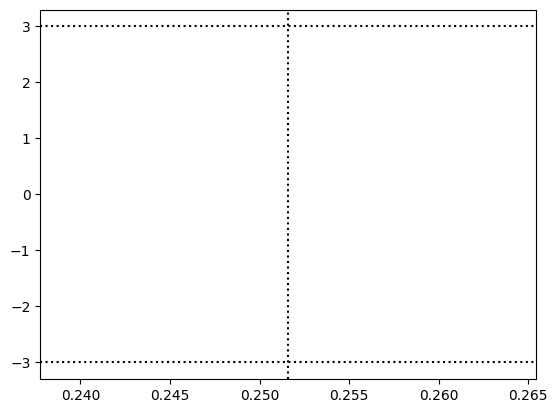

In [90]:
Y_pred_41 = pd.DataFrame(Y_pred_41)
Y_pred_41['residual']
Y_pred_41['squared'] = Y_pred_41['residual']**2
mse_test = Y_pred_41['squared'].sum()/(len(Y_pred_41['squared']))
Y_pred_41['leverage'] = leverage_screen
Y_pred_41['standard'] = Y_pred_41['residual']/(mse_test)**0.5


# plt.scatter(Y_train['leverage'], Y_train['standard'], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(Y_pred_41['leverage'], Y_pred_41['standard'], color='navy', label='Tập kiem luyện', marker='o', s=50, edgecolors='black')
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x = 0.2516, color='black', linestyle='dotted')


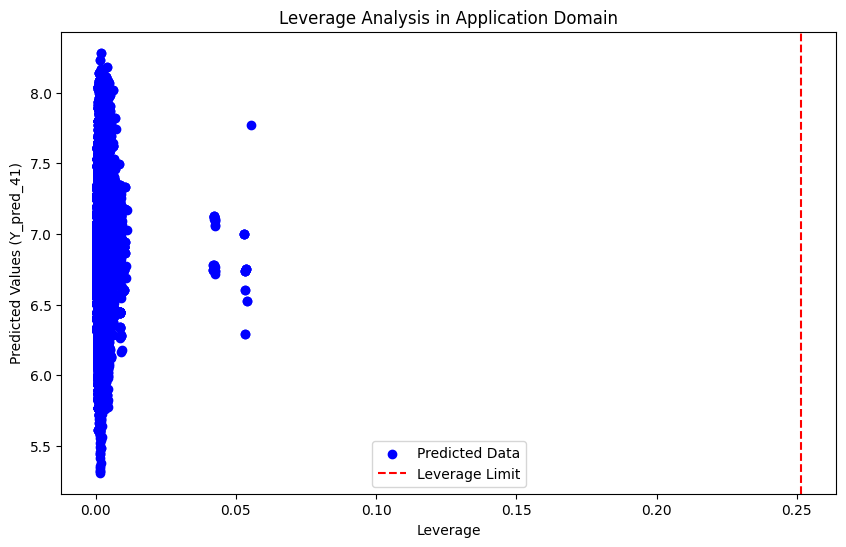

In [92]:
# Giả sử Y_41 đã có cột 'leverage' và 'pred' (giá trị dự đoán)
plt.figure(figsize=(10, 6))

# Vẽ scatter plot leverage vs. giá trị dự đoán
plt.scatter(Y_pred_41['leverage'], Y_pred_41[0], color='blue', label='Predicted Data')

# Vẽ các đường giới hạn leverage nếu cần
leverage_limit = 3 * (80 / 954)  # Thông thường leverage giới hạn là 3*(p/n)
plt.axvline(x=leverage_limit, color='red', linestyle='--', label='Leverage Limit')

# Đặt tiêu đề và nhãn cho các trục
plt.title('Leverage Analysis in Application Domain')
plt.xlabel('Leverage')
plt.ylabel('Predicted Values (Y_pred_41)')
plt.legend()

# Hiển thị biểu đồ
plt.show()
